In [1]:
from datasets import load_dataset, Dataset, concatenate_datasets
import json

dataset = load_dataset("iluvvatar/RuNNE")
dataset = concatenate_datasets(
    [
        dataset["train"],
        dataset["test"],
        dataset["dev"],
    ]
)
dataset

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No config specified, defaulting to: ru_nne/data
Found cached dataset ru_nne (/home/kosenko/.cache/huggingface/datasets/iluvvatar___ru_nne/data/1.0.0/5c0467600cde2a64546227a05688adcfcdcb583c442a7cac64b864313a68e588)
100%|██████████| 3/3 [00:00<00:00, 122.37it/s]


Dataset({
    features: ['id', 'text', 'entities'],
    num_rows: 877
})

In [11]:
new_dataset = []

for i in range(len(dataset)):
    text = dataset[i]["text"]
    entities = dataset[i]["entities"]
    parsed_entities = []
    for entit in entities:
        start, end, ent_name = list(entit.split())
        start, end = int(start), int(end)
        text_with_pos = text[:end]
        ent = text[start:end]
        # print(f"text_with_pos={text_with_pos}")
        # print(f"ent_name={ent_name}")
        # print(f'ent={ent}')
        # print("-"*10)
        parsed_entities.append(
            {
                # "text_pos": text_with_pos,
                "name": ent_name,
                "ent": ent,
                "pos": f"{start} {end}",
            }
        )
    parsed_entities = parsed_entities[:30]
    if len(parsed_entities) > 0:
        parsed_entities = json.dumps(
            parsed_entities,
            ensure_ascii=False,
            # indent=1,
        )
        new_dataset.append(
            {
                "text": text,
                "parsed_entities": parsed_entities,
            }
        )
    # break

In [12]:
len(new_dataset)

554

In [13]:
from transformers import AutoTokenizer
from verbalist.datasets.utils import visualize_hist

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf")

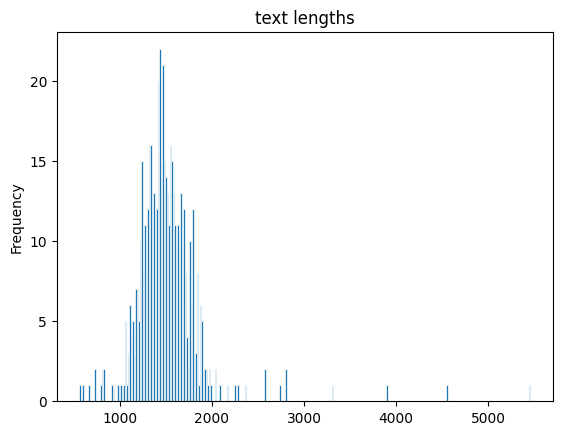

In [14]:
conversation_lengths = []


for item in new_dataset:
    # all_text = item['text']
    all_text = item['text'] + item['parsed_entities']
    conversation_lengths.append(len(tokenizer(all_text)["input_ids"]))
    # print(all_text)
    # print("="*100)
    # print("="*100)
    # print("="*100)
    # break
    # if has_cyrillic(all_text):
    #     rus_conv.append(conversation)


visualize_hist(conversation_lengths, "text lengths")

In [20]:
import numpy as np

filter_num = 97
np.percentile(conversation_lengths, filter_num)

1977.1499999999996

In [21]:
short_ents = (np.array(conversation_lengths) < np.percentile(conversation_lengths, filter_num)).tolist()
short_dataset = []
for i, is_short in enumerate(short_ents):
    if is_short:
        short_dataset.append(new_dataset[i])

In [22]:
short_dataset = Dataset.from_list(short_dataset)
short_dataset

Dataset({
    features: ['text', 'parsed_entities'],
    num_rows: 537
})

In [25]:
# for item in short_dataset:
#     print(item['parsed_entities'])

In [24]:
short_dataset.push_to_hub("dim/runne_prompts")

Deleting unused files from dataset repository: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]
Updating downloaded metadata with the new split.


In [1]:
from datasets import load_dataset

dataset = load_dataset("dim/runne_prompts")
dataset = dataset["train"]
dataset[0]

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 542.53it/s]


Dataset parquet downloaded and prepared to /home/kosenko/.cache/huggingface/datasets/dim___parquet/dim--runne_prompts-8506348ea5da8e6e/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


100%|██████████| 1/1 [00:00<00:00, 717.34it/s]


{'text': 'Ким Чен Нама убили с помощью запрещённого химоружия\n\nVX\nПолиция Малайзии установила вещество, с помощью которого был убит Ким Чен Нам — брат лидера КНДР Ким Чен Ына, — это отравляющее вещество нервно-паралитического действия (VX Nerve Agent), которое является химическим оружием.\n\nВ пресс-релизе малайзийской полиции говорится:\n\n\nЦентр анализа химического оружия департамента полиции провёл анализы проб, взятых со слизистой оболочки глаза и лица умершего.\n\nВ нём поясняется, что VX причислен к химоружию «Конвенцией о запрещении разработки, производства, накопления и применения химического оружия и о его уничтожении» от 1997 года.\n\nПозднее выяснилось, что у одной из подозреваемых в убийстве Ким Чен Нама проявлялись симптомы отравления этим веществом.\n\nКим Чен Нам, старший брат лидера КНДР Ким Чен Ына, скончался 13 февраля 2017 года в Малайзии. По предварительным данным, его отравили в аэропорту, когда он направлялся из Малайзии в Макао. По подозрению в причастности к